# Pipelines para variables categóricas

A continuación, se considerará el caso de las variables categóricas.

In [6]:
import pandas as pd
import numpy as np
from sklearn import preprocessing as preprocessing
from matplotlib import pyplot as plt
import seaborn as sns

Para procesar variables categóricas para que estas sean fácilmente interpretables por modelos de regresión o clasificación en `Python`, hay dos alternativas:
- ***Dummy***. Representación compacta, mejor para *inputs* linealmente independientes.
- ***One-hot***. Permite describir categorías no incluidas inicialmente. Se diferencia del mapeo ***dummy*** en que permite considerar categorías que no estaban en el marco de datos cuando se entrenó el modelo. Esta es la estructura que se suele emplear más.

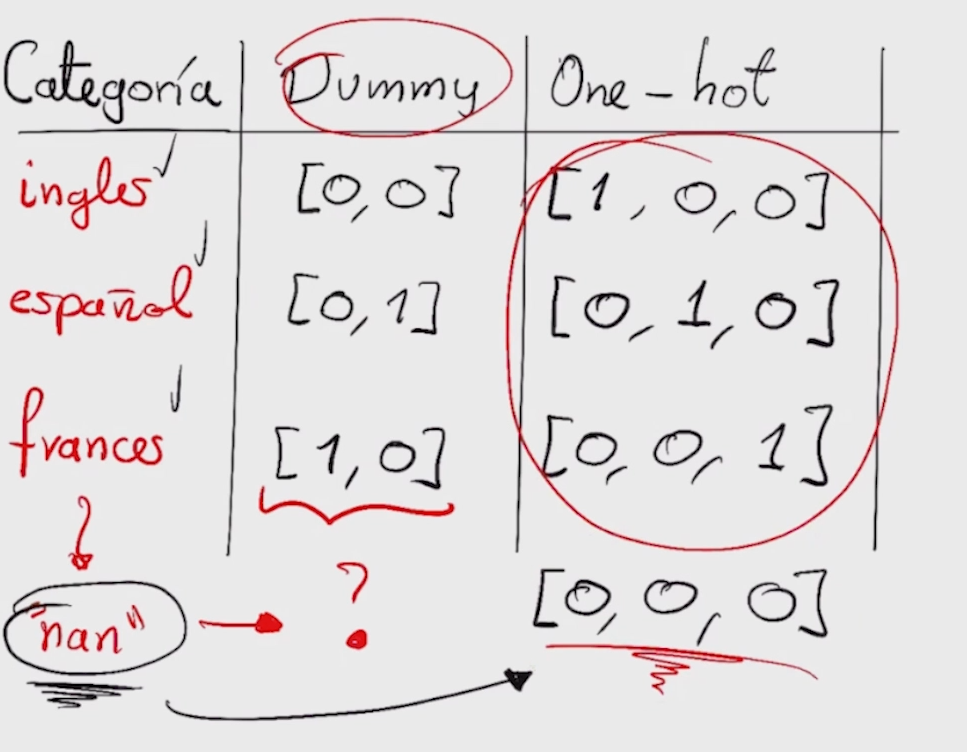

Vamos a leer el marco de datos de autos:

In [2]:
df = pd.read_csv('../Datos/cars.csv')
df.head()

,manufacturer_name,model_name,transmission,color,odometer_value,year_produced,engine_fuel,engine_has_gas,engine_type,engine_capacity,...,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,feature_9,duration_listed
0,Subaru,Outback,automatic,silver,190000,2010,gasoline,False,gasoline,2.5,...,True,True,True,False,True,False,True,True,True,16
1,Subaru,Outback,automatic,blue,290000,2002,gasoline,False,gasoline,3.0,...,True,False,False,True,True,False,False,False,True,83
2,Subaru,Forester,automatic,red,402000,2001,gasoline,False,gasoline,2.5,...,True,False,False,False,False,False,False,True,True,151
3,Subaru,Impreza,mechanical,blue,10000,1999,gasoline,False,gasoline,3.0,...,False,False,False,False,False,False,False,False,False,86
4,Subaru,Legacy,automatic,black,280000,2001,gasoline,False,gasoline,2.5,...,True,False,True,True,False,False,False,False,True,7


In [5]:
df.engine_type.unique()

array(['gasoline', 'diesel', 'electric'], dtype=object)

Nótese que se tienen tres categorías. Luego, usando `pd.get_dummies`:

In [3]:
pd.get_dummies(df['engine_type'])

,diesel,electric,gasoline
0,0,0,1
1,0,0,1
2,0,0,1
3,0,0,1
4,0,0,1
...,...,...,...
38526,0,0,1
38527,1,0,0
38528,0,0,1
38529,0,0,1


Ahora revisemos cómo funciona codificador *one-coder*:

In [11]:
encoder = preprocessing.OneHotEncoder(handle_unknown = 'ignore')

In [12]:
encoder.fit(df[['engine_type']].values)

OneHotEncoder(handle_unknown='ignore')

In [13]:
encoder.transform([['gasoline'], ['diesel'], ['aceite']]).toarray()

array([[0., 0., 1.],
       [1., 0., 0.],
       [0., 0., 0.]])

Variables numéricas discretas pueden ser codificadas como categóricas

In [14]:
encoder.fit(df[['year_produced']].values)

OneHotEncoder(handle_unknown='ignore')

In [17]:
encoder.transform([[2016], [2009], [1990], [1936]]).toarray()

array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0